In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras


In [4]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

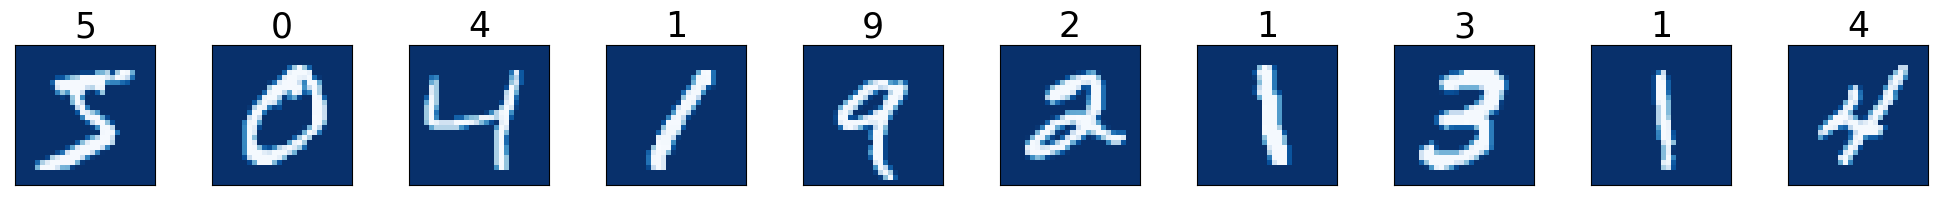

In [5]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='Blues_r')
    ax.set_title(str(train_y[idx]),fontsize=25)

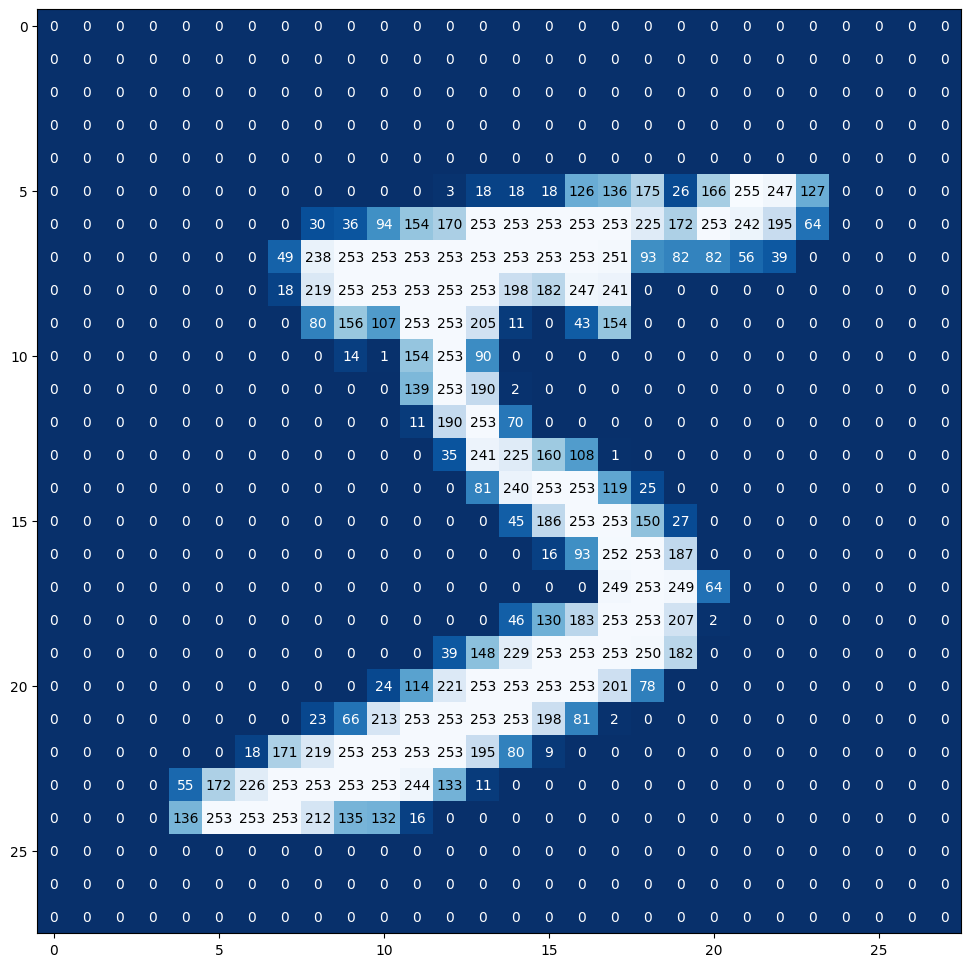

In [6]:
img = train_x[0]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [7]:
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


# PCA

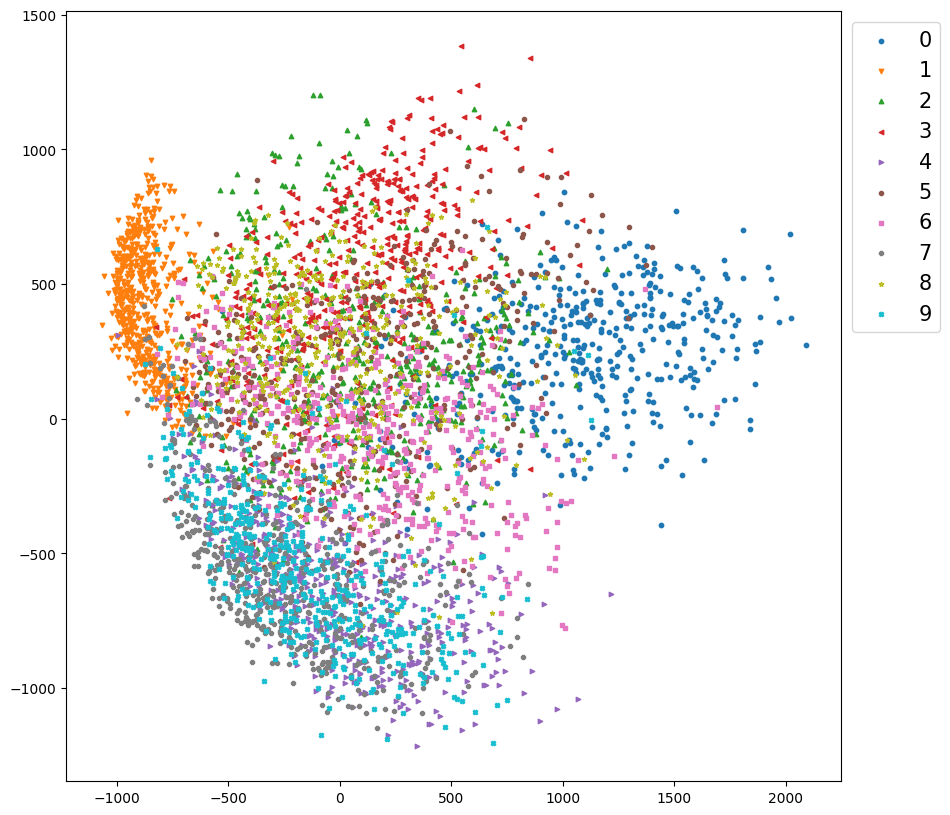

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

# Truncated SVD

## extracting and decomposing only the upper part of the diagonal elements in the sigma matrix, that is, the upper part of the singular values. 

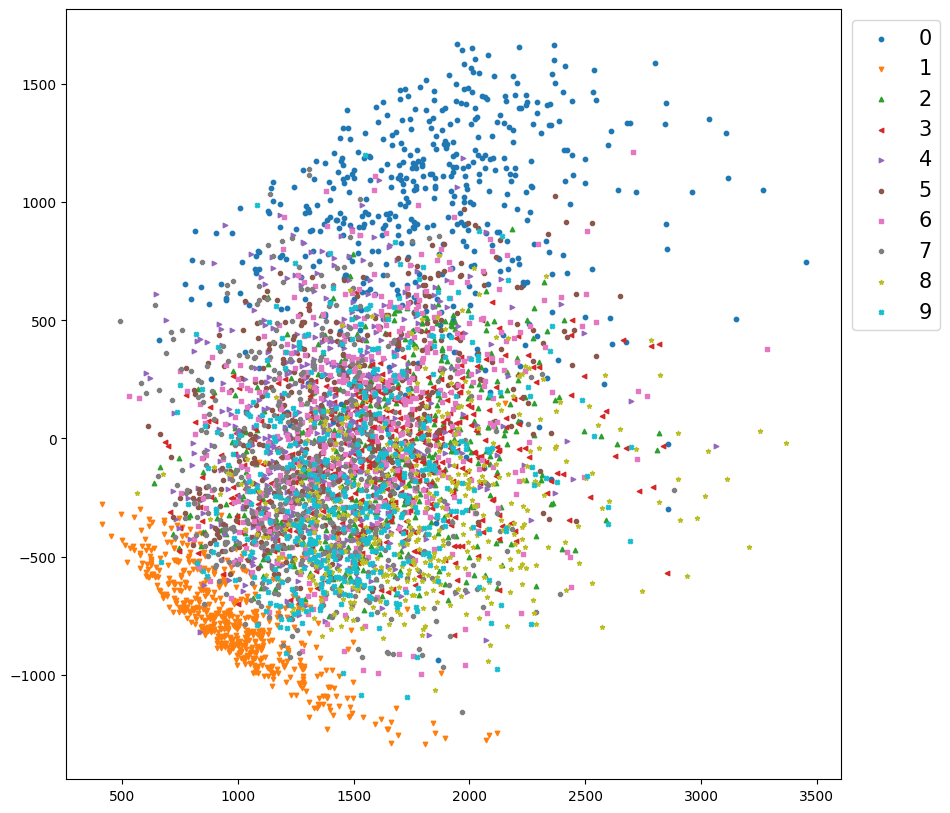

In [9]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD()
x_tsvd = tsvd.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsvd[mask, 0], x_tsvd[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

# NMF

## variant of the Low-Rank Approximation method like SVD. 

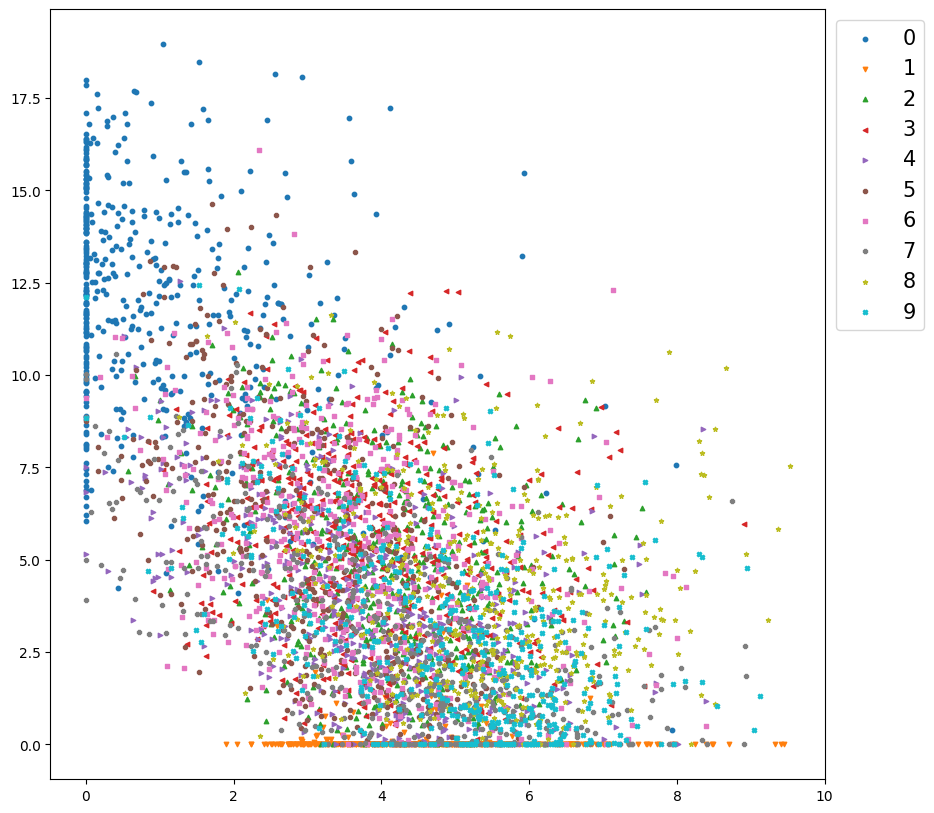

In [10]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf = nmf.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_nmf[mask, 0], x_nmf[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

# LDA

## dimensionality reduction in the classification problem of supervised learning

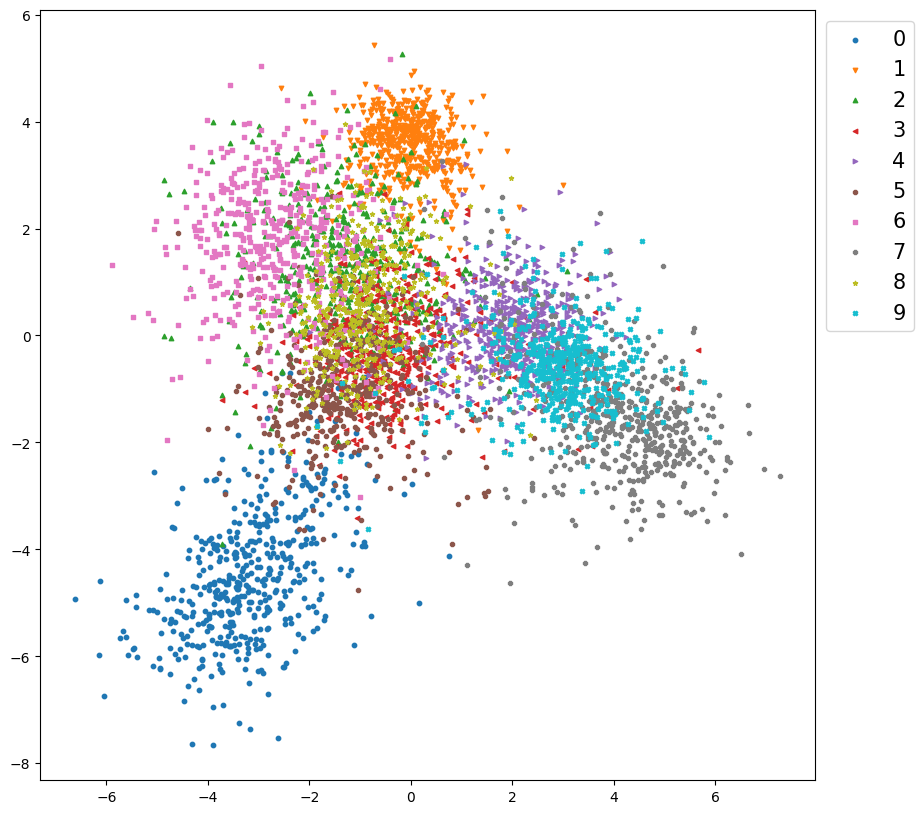

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

# t-SNE

## compressing data on a two-dimensional plane. Points are expressed in a two-dimensional plane when they are close to the original feature. Nonlinear relationship can use this method. 

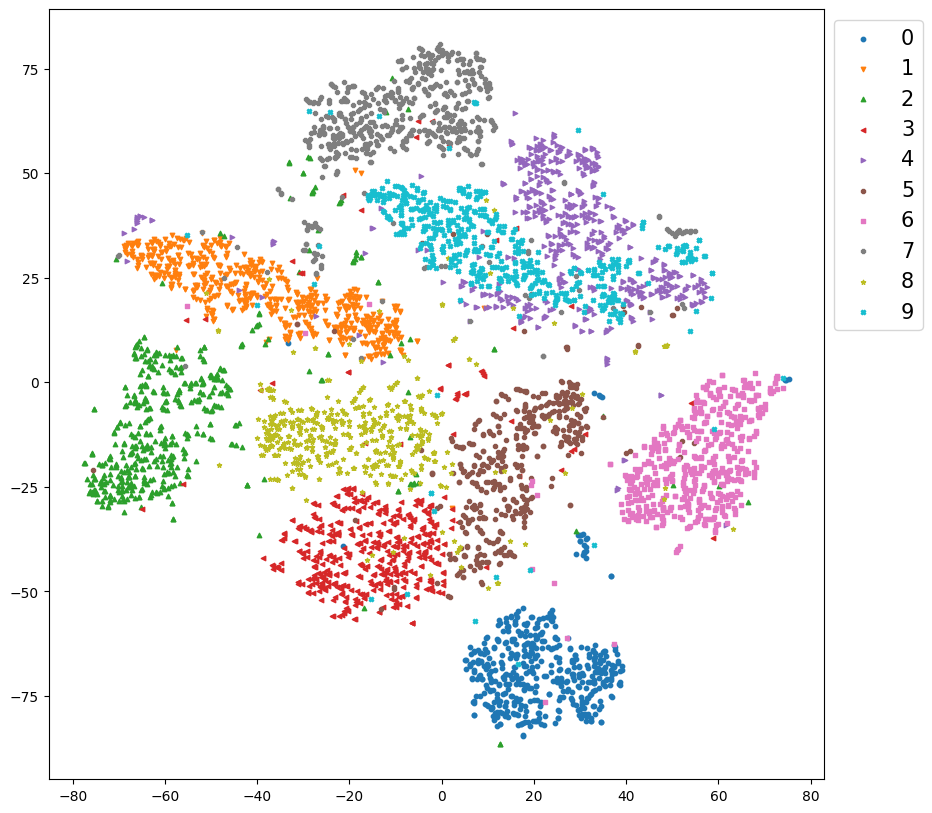

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

## Faster than t-sne, and separates the data space well. Proposed for nonlinear dimensionality reduction. So it can process large datasets quickly. 

In [13]:
! pip install numba --upgrade

  Using cached numba-0.56.3-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-win_amd64.whl (23.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


c:\ProgramData\Anaconda3\envs\yujinyeo\lib\site-packages\numba\core\cpu.py:97: UserWarning:

Numba extension module 'numba_dppy.numpy_usm_shared' failed to load due to 'ImportError(cannot import name 'TargetConfig' from 'numba.core.dispatcher' (c:\ProgramData\Anaconda3\envs\yujinyeo\lib\site-packages\numba\core\dispatcher.py))'.



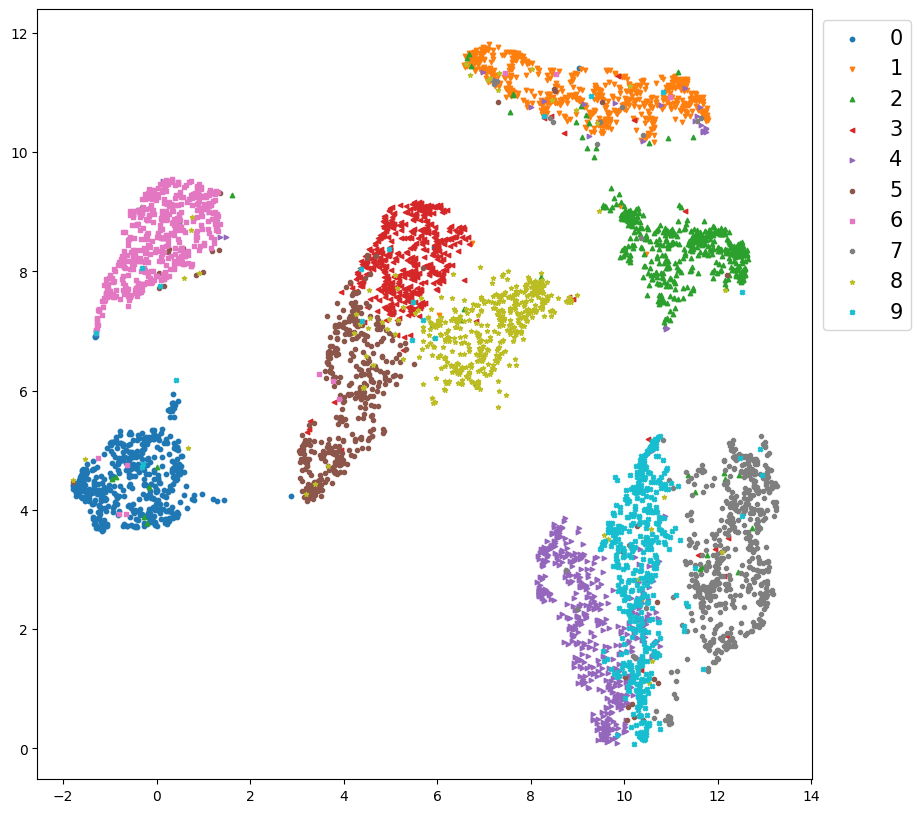

In [14]:
import umap

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

In [15]:
train = pd.read_csv(r"C:\temp\train.csv")

target = train['target']
train = train.drop(["target", "ID"], axis=1)

print ("Rows: " + str(train.shape[0]) + ", Columns: " + str(train.shape[1]))
train.head()

Rows: 4459, Columns: 4991


,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler

standardized_train = StandardScaler().fit_transform(train.values)

In [17]:
!pip install plotly chart_studio --upgrade
!pip install cufflinks --upgrade

  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.10.0
    Uninstalling plotly-5.10.0:


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\envs\\yujinyeo\\etc\\jupyter\\nbconfig\\notebook.d\\jupyterlab-plotly.json'
Consider using the `--user` option or check the permissions.



In [18]:
import chart_studio.plotly as py
import cufflinks as cf


import plotly.graph_objs as go
from plotly.offline import iplot

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [19]:
feature_df = train.describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['distinct_vals'] = feature_df['columns'].apply(lambda x : len(train[x].value_counts()))
feature_df['column_var'] = feature_df['columns'].apply(lambda x : np.var(train[x]))
feature_df['column_std'] = feature_df['columns'].apply(lambda x : np.std(train[x]))
feature_df['column_mean'] = feature_df['columns'].apply(lambda x : np.mean(train[x]))
feature_df['target_corr'] = feature_df['columns'].apply(lambda x : np.corrcoef(target, train[x])[0][1])
feature_df.head()

,columns,count,mean,std,min,25%,50%,75%,max,distinct_vals,column_var,column_std,column_mean,target_corr
0,48df886f9,4459.0,14654.930101,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0,32,1.515437e+11,3.892862e+05,14654.930101,0.010188
1,0deb4b6a8,4459.0,1390.894819,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0,5,4.131381e+09,6.427582e+04,1390.894819,0.013805
2,34b15f335,4459.0,26722.450922,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0,29,3.247875e+11,5.699013e+05,26722.450922,0.014694
3,a8cb14b00,4459.0,4530.163714,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0,3,5.564218e+10,2.358860e+05,4530.163714,-0.002917
4,2f0771a37,4459.0,26409.957390,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0,6,2.293893e+12,1.514560e+06,26409.957390,0.016647


In [22]:
feature_df = feature_df.sort_values('column_var', ascending = True)
feature_df['column_var'] = (feature_df['column_var'] - feature_df['column_var'].min()) / (feature_df['column_var'].max() - feature_df['column_var'].min())
trace1 = go.Scatter(x=feature_df['columns'], y=feature_df['column_var'], opacity=0.75, marker=dict(color="red"))
layout = dict(height=400, title='Feature Variance', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [23]:
trace1 = go.Histogram(x=feature_df[feature_df['column_var'] <= 0.01]['column_var'], opacity=0.45, marker=dict(color="red"))
layout = dict(height=400, title='Distribution of Variable Variance <= 0.01', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

trace1 = go.Histogram(x=feature_df[feature_df['column_var'] > 0.01]['column_var'], opacity=0.45, marker=dict(color="red"))
layout = dict(height=400, title='Distribution of Variable Variance > 0.01', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [24]:
trace1 = go.Histogram(x=feature_df['target_corr'], opacity=0.45, marker=dict(color="green"))
layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [25]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(standardized_train, axis=0)
cov_matrix = np.cov(standardized_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)

# Individual explained variance
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
var_exp_real = [v.real for v in var_exp]

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 
cum_exp_real = [v.real for v in cum_var_exp]

## plot the variance and cumulative variance 
trace1 = go.Scatter(x=train.columns, y=var_exp_real, name="Individual Variance", opacity=0.75, marker=dict(color="red"))
trace2 = go.Scatter(x=train.columns, y=cum_exp_real, name="Cumulative Variance", opacity=0.75, marker=dict(color="blue"))
layout = dict(height=400, title='Variance Explained by Variables', legend=dict(orientation="h", x=0, y=1.2));
fig = go.Figure(data=[trace1, trace2], layout=layout);
iplot(fig);

In [26]:
def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components
pca = PCA()
train_pca = pca.fit_transform(standardized_train)
components = _get_number_components(pca, threshold=0.85)
components

993

In [34]:
### Implement PCA 
obj_pca = model = PCA(n_components = components)
X_pca = obj_pca.fit_transform(standardized_train)

## Visualize the Components 
#plot_2_components(X_pca, 'PCA - First Three Component')
#plot_3_components(X_pca, 'PCA - First Two Components')



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [array([[-3.34425759,  1.33573265, -0.36874549, ...,  0.05718838,
        -0.41314655,  0.02036817],
       [-3.51430516,  0.5585246 , -0.58644568, ..., -0.1933332 ,
         0.15851684, -0.49243339],
       [-4.77426124,  0.50276233, -0.93966535, ..., -0.04296272,
        -0.0395721 ,  0.07427736],
       ...,
       [ 0.71404947,  4.2426104 ,  1.32336431, ...,  0.03558405,
         0.82513868, -0.47162506],
       [-4.71009004,  0.62633155, -0.99649204, ...,  0.02961423,
        -0.03586775,  0.07212837],
       [ 0.12536904,  2.14392601, -0.31903095, ...,  0.96040157,
         0.43274222,  0.25153924]])]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [ ]:
### Implement Truncated SVD 
obj_svd = TruncatedSVD(n_components = components)
X_svd = obj_svd.fit_transform(standardized_train)

## Visualize the Components 
#plot_3_components(X_svd, 'Truncated SVD - First three components')
#plot_2_components(X_svd, 'Truncated SVD - First two components')

In [ ]:
### Implement ICA 
obj_ica = FastICA(n_components = 30)
X_ica = obj_ica.fit_transform(standardized_train)

## Visualize the Components 
#plot_3_components(X_ica, 'ICA - First three components')
#plot_2_components(X_ica, 'ICA - First two components')

In [ ]:
### Implement Factor Analysis 
obj_fa = FactorAnalysis(n_components = 30)
X_fa = obj_fa.fit_transform(standardized_train)

## Visualize the Components 
#plot_3_components(X_fa, 'Factor Analysis - First three components')
# plot_2_components(X, 'Factor Analysis - First two components')

In [ ]:
### Implement NonNegative Matrix Factorization
obj = NMF(n_components = 2)
X_nmf = obj.fit_transform(train)

## Visualize the Components 
# plot_3_components(X, 'NNMF - First three components')
#plot_2_components(X_nmf, 'NNMF - First two components')

In [ ]:
### Implement Gaussian Random Projection
obj_grp = GaussianRandomProjection(n_components = 30, eps=0.1)
X_grp = obj_grp.fit_transform(standardized_train)

## Visualize the Components 
#plot_3_components(X_grp, 'Gaussian Random Projection - First three components')
#plot_2_components(X_grp, 'Gaussian Random Projection - First two components')

In [ ]:
### Implement Sparse Random Projection
obj_srp = SparseRandomProjection(n_components = 30, eps=0.1)
X_srp = obj_srp.fit_transform(standardized_train)

## Visualize the Components 
#plot_3_components(X_srp, 'Sparse Random Projection - First three components')
#plot_2_components(X_srp, 'Sparse Random Projection - First two components')